In [14]:
# 这一节我们将采用随机森林回归器（random forest regressor）来估计输出结果
# 随机森林是一个决策树集合，它基本上就是用一组由数据集的若干子集构建的决策树构成，再用决策树平均值改善整体学习效果

import csv
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


def plot_feature_importances(feature_importances, title, feature_names):

    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    index_sorted = np.flipud(np.argsort(feature_importances))

    pos = np.arange(index_sorted.shape[0]) + 0.5

    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

def load_dataset(filename):
    file_reader = csv.reader(open(filename), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:13])
        y.append(row[-1])
    
    feature_names = np.array(X[0])

    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

In [15]:
X, y, feature_names = load_dataset('bike_day.csv')
X, y = shuffle(X, y, random_state=7)

num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Random Forest regressor performance ####
Mean squared error = 360188.0
Explained variance score = 0.89


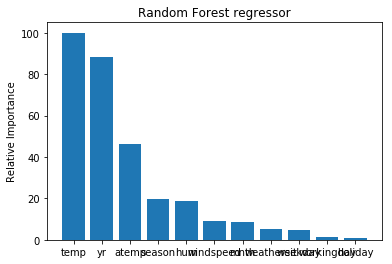

In [16]:
# 评估随机森林回归器的训练效果

from sklearn.metrics import mean_squared_error, explained_variance_score

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)